# TensorFlow

TensorFlow is an open source software library for numerical computation using data flow graphs. In a data flow graph, nodes represent mathematical operations and edges represent the multidimensional data arrays (tensors) communicated between them.

![](https://raw.githubusercontent.com/wdbm/abstraction/master/media/2016-05-14T1754Z.png)

In [1]:
import tensorflow as tf

In [2]:
tf.TF_CPP_MIN_LOG_LEVEL = 3

In [3]:
# Create a constant operation. This operation is added as a node to the default graph.
hello = tf.constant("hello world")

# Start a TensorFlow session.
sess = tf.Session()

# Run the operation and get the result.
print(sess.run(hello))

hello world


# tensors, ranks, shapes and types

|**rank**|**mathamatical object**|**shape**  |**example**                       |
|--------|-----------------------|-----------|----------------------------------|
|0       |scalar                 |`[]`       |`3`                               |
|1       |vector                 |`[3]`      |`[1. ,2., 3.]`                    |
|2       |matrix                 |`[2, 3]`   |`[[1., 2., 3.], [4., 5., 6.]]`    |
|3       |3-tensor               |`[2, 1, 3]`|`[[[1., 2., 3.]], [[7., 8., 9.]]]`|
|n       |n-tensor               |...        |...                               |

|**data type**|Python type|**description**       |
|-------------|-----------|----------------------|
|`DT_FLOAT`   |`t.float32`|32 bits floating point|
|`DT_DOUBLE`  |`t.float64`|64 bits floating point|
|`DT_INT8`    |`t.int8`   |8 bits signed integer |
|`DT_INT16`   |`t.int16`  |16 bits signed integer|
|`DT_INT32`   |`t.int32`  |32 bits signed integer|
|`DT_INT64`   |`t.int64`  |64 bits signed integer|

# TensorFlow mechanics

- 1 Build a graph using TensorFlow operations.
- 2 Feed data to TensorFlow and run the graph.
- 3 Update variables in the graph and return values.

In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # (also tf.float32 by default)
node3 = tf.add(node1, node2)

print("node1: {node}".format(node = node1))
print("node2: {node}".format(node = node2))
print("node3: {node}".format(node = node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32)
node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
sess = tf.Session()

print("sess.run(node1, node2): {result}".format(
    result = sess.run([node1, node2])
))
print("sess.run(node3):        {result}".format(
    result = sess.run(node3)
))

sess.run(node1, node2): [3.0, 4.0]
sess.run(node3):        7.0


In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# Create a node that is a shortcut for tf.add(a, b).
adder_node = a + b

result = sess.run(
    adder_node,
    feed_dict = {
        a: 3,
        b: 4.5
    }
)
print(result)

7.5


In [7]:
result = sess.run(
    adder_node,
    feed_dict = {
        a: [1,3],
        b: [2, 4]
    }
)

print(result)

[ 3.  7.]


In [8]:
add_and_triple = adder_node * 3.

result = sess.run(
    add_and_triple,
    feed_dict = {
        a: 3,
        b: 4.5
    }
)

print(result)

22.5


# variables

In [10]:
# Create two variables.
weights = tf.Variable(
    tf.random_normal(
        [784, 200],
        stddev = 0.35
    ),
    name = "weights"
)
biases = tf.Variable(
    tf.zeros([200]),
    name = "biases"
)

# Create an operation to initialize the variables.
init_op = tf.global_variables_initializer()

# more code

with tf.Session() as sess:
    sess.run(init_op)

# single variable linear regression

- hypothesis: ${H\left(x\right)=Wx+b}$

- cost function: ${\textrm{cost}\left(W,b\right)=\frac{1}{m}\Sigma_{i=1}^{m}\left(H\left(x^{i}\right)-y^{i}\right)^{2}}$

In [11]:
import tensorflow as tf
tf.set_random_seed(777)

# Create some data.
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Build the graph using TensorFlow operations. With the hypothesis H(x) = Wx + b, the goal is to try to find values for W and b to in order to calculate y_data = x_data * W + b. Analytically, W should be 1 and b should be 0.
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Define the hypothesis.
hypothesis = x_train * W + b

# Define the cost function.
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Define a method of minimisation, in this case gradient descent. In gradient descent, steps proportional to the negative of the function gradient at the current point are taken. It is the method of steepest descent to find the local minimum of a function.
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initialize global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit.
for step in range(2001):
    sess.run(train)
    if step % 500 == 0:
        print("step: {step}, cost: {cost}, W: {W}, b: {b}".format(
            step = step,
            cost = sess.run(cost),
            W    = sess.run(W),
            b    = sess.run(b)
        ))

step: 0, cost: 0.327590852976, W: [ 1.69378853], b: [-1.30574894]
step: 500, cost: 0.0235481653363, W: [ 1.17822742], b: [-0.40515277]
step: 1000, cost: 0.00212170509622, W: [ 1.05349815], b: [-0.12161381]
step: 1500, cost: 0.000191168233869, W: [ 1.01605844], b: [-0.0365047]
step: 2000, cost: 1.72240033862e-05, W: [ 1.00482023], b: [-0.01095748]


# placeholders and variables

A variable (`tf.Variable`) is used generally for trainable variables such as weights and biases for a model. A placeholder (`tf.placeholder`) is used to feed actual training examples. A variable is set with an initial value on declaration while a placeholder doesn't require an initial value on declaration, but has its value specified at run time using the session `feed_dict`. In TensorFlow, variables are trained over time while placeholders are input data that doesn't change as the model trains (e.g. input images and class labels for the images).

A placeholder is a value that is input when TensorFlow is set to run a computation. A variable is a modifiable tensor that exists in TensorFlow's graph of interacting operations.

In [12]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Create placeholders for tensors for x and y data.
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

hypothesis = x_train * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Fit.
for step in range(2001):
    cost_value, W_value, b_value, _ = sess.run(
        [cost, W, b, train],
        feed_dict = {
            X: [1, 2, 3],
            Y: [1, 2, 3]
        }
    )
    if step % 500 == 0:
        print("step: {step}, cost: {cost}, W: {W}, b: {b}".format(
            step = step,
            cost = cost_value,
            W    = W_value,
            b    = b_value
        ))

# Test the trained model.
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

step: 0, cost: 19.0289134979, W: [-0.81955934], b: [ 0.05452838]
step: 500, cost: 0.0066645629704, W: [ 0.90541184], b: [ 0.21502104]
step: 1000, cost: 0.000600479834247, W: [ 0.97160774], b: [ 0.06454235]
step: 1500, cost: 5.41025183338e-05, W: [ 0.99147761], b: [ 0.01937346]
step: 2000, cost: 4.87493980472e-06, W: [ 0.99744177], b: [ 0.00581537]
[ 1.00325716  2.0006988   2.99814057]
[ 1.00325716  2.0006988   2.99814057]
[ 1.00325716  2.0006988   2.99814057]


# cost minimization

- simplified hypothesis: ${H\left(x\right)=Wx}$

- cost function: ${\textrm{cost}\left(W\right)=\frac{1}{m}\Sigma_{i=1}^{m}\left(H\left(x^{i}\right)-y^{i}\right)^{2}}$

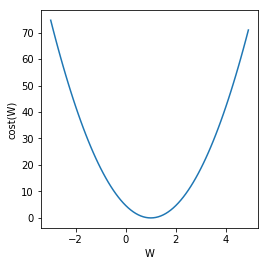

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_value    = []
cost_value = []

for i in range(-30, 50):

    feed_W = i * 0.1
    cost_current, W_current = sess.run(
        [cost, W],
        feed_dict = {W: feed_W}
    )

    W_value.append(W_current)
    cost_value.append(cost_current)

plt.xlabel("W"); plt.ylabel("cost(W)")
plt.plot(W_value, cost_value)
plt.axes().set_aspect(1 / plt.axes().get_data_ratio())
plt.show()

# multivariable linear regression

- hypothesis defined without using a matrix: ${H\left(x_{1},x_{2},x_{3}\right)=x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}}$

test scores for general psychology:

|**${x_{1}}$**|**${x_{2}}$**|**${x_{3}}$**|**${Y}$**|
|-------------|-------------|-------------|---------|
|73           |80           |75           |152      |
|93           |88           |93           |185      |
|89           |91           |90           |180      |
|96           |98           |100          |196      |
|73           |66           |70           |142      |

In [18]:
import tensorflow as tf

x1_data = [ 73.,  93.,  89.,  96.,  73.]
x2_data = [ 80.,  88.,  91.,  98.,  66.]
x3_data = [ 75.,  93.,  90., 100.,  70.]

y_data  = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = "weight1")
w2 = tf.Variable(tf.random_normal([1]), name = "weight2")
w3 = tf.Variable(tf.random_normal([1]), name = "weight3")
b  = tf.Variable(tf.random_normal([1]), name = "bias"   )

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {
            x1: x1_data,
            x2: x2_data,
            x3: x3_data,
            Y:  y_data
        }
    )

    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction: {prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))


step: 0, cost: 1221.08886719,
prediction: [ 123.09977722  145.56219482  144.64117432  158.4463501   109.52912903]

step: 500, cost: 5.31126022339,
prediction: [ 153.60321045  183.01623535  181.1355896   198.21069336  138.27522278]

step: 1000, cost: 4.28688764572,
prediction: [ 153.2394104   183.26794434  181.02700806  198.10955811  138.62460327]

step: 1500, cost: 3.50106287003,
prediction: [ 152.92288208  183.48718262  180.93289185  198.01914978  138.9311676 ]

step: 2000, cost: 2.89726567268,
prediction: [ 152.6476593   183.67808533  180.85136414  197.93815613  139.20033264]


- hypothesis defined using a matrix:

$${
\begin{pmatrix}
x_{1} & x_{2} & x_{3}\\
\end{pmatrix}
\cdot
\begin{pmatrix}
w_{1} \\
w_{2} \\
w_{3} \\
\end{pmatrix}
=
\left(x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}\right)
}$$

$${
H\left(X\right)=XW
}$$

In [23]:
import tensorflow as tf

x_data = [
             [ 73.,  80.,  75.],
             [ 93.,  88.,  93.],
             [ 89.,  91.,  90.],
             [ 96.,  98., 100.],
             [ 73.,  66.,  70.]
         ]
y_data = [
             [152.],
             [185.],
             [180.],
             [196.],
             [142.]
         ]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]),    name = "bias"  )

hypothesis = tf.matmul(X, W) + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction:\n{prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))


step: 0, cost: 65613.796875,
prediction:
[[-70.3801651 ]
 [-92.29891968]
 [-86.97892761]
 [-94.72986603]
 [-72.28895569]]

step: 500, cost: 13.3241577148,
prediction:
[[ 156.13461304]
 [ 181.35145569]
 [ 181.92817688]
 [ 198.17074585]
 [ 136.72895813]]

step: 1000, cost: 10.2774734497,
prediction:
[[ 155.48991394]
 [ 181.79486084]
 [ 181.73246765]
 [ 198.01477051]
 [ 137.32301331]]

step: 1500, cost: 7.95214223862,
prediction:
[[ 154.92767334]
 [ 182.18174744]
 [ 181.56201172]
 [ 197.8772583 ]
 [ 137.84272766]]

step: 2000, cost: 6.17698717117,
prediction:
[[ 154.43740845]
 [ 182.51925659]
 [ 181.41358948]
 [ 197.75588989]
 [ 138.29750061]]


# reading data

There are three main methods to get data into a TensorFlow program:

- Feeding: Python code provides the data when running each step.
- Reading from files: an input pipeline reads the data from files at the beginning of a graph.
- Preloaded data: a constant or variable in the graph holds all the data (for small datasets).

## feeding

The TensorFlow feed mechanism enables injection of data into any tensor in a computation graph. Thus, a Python computation can feed data directly into the graph. While a tensor can be replaced with feed data, including variables and constants, good practice is to use a placeholder operation node. A `placeholder` exists solely to serve as the target of feeds. It is not initialized and contains no data and it generates an error if it is executed without a feed.

## reading from files

A typical pipeline for reading records from files has the following stages:

- the list of filenames,
- optional filename shuffling,
- optional epoch limit,
- filename queue,
- a reader for the file format,
- a decoder for a record read by the reader,
- optional preprocessing and
- an example queue.

### file formats

Select the reader that matches the input file format and pass the filename queue to the reader's read method. The read method outputs a key identifying the file and record and a scalar string value. One or more of the decoder and conversion operations are used to decode this string into the tensors that make up an example.

For CSV files, the `TextLineReader` is available.

A recommended format for TensorFlow is a `TFRecords file`, for which the `TFRecordReader` is available.

### loading CSV data from file

Consider data in an ASCII file of the following CSV form:

```
73,80,75,152
93,88,93,185
89,91,90,180
96,98,100,196
73,66,70,142
```

This can be loaded naïvely into volatile memory.

In [33]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt(
    "data.csv",
    delimiter = ",",
    dtype     = np.float32
)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]),    name = "bias"  )

hypothesis = tf.matmul(X, W) + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {X: x_data, Y: y_data}
    )
    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction:\n{prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))

print("\npredictions")
test_x_data = [
                  [100, 70, 101]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))

test_x_data = [
                  [60, 70, 110],
                  [90, 100, 80]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))


step: 0, cost: 51609.5585938,
prediction:
[[-63.79487228]
 [-67.67445374]
 [-71.40155029]
 [-78.36078644]
 [-48.58982849]
 [-35.12105179]
 [-61.62991333]
 [-50.24700165]
 [-61.59102249]
 [-57.17690277]
 [-56.07018661]
 [-51.35820007]
 [-73.14998627]
 [-59.25958252]
 [-60.58699036]
 [-70.00971222]
 [-52.90825653]
 [-76.68890381]
 [-71.02648163]
 [-64.50036621]
 [-71.00350952]
 [-64.46847534]
 [-68.2816925 ]
 [-62.86103439]
 [-71.41112518]]

step: 500, cost: 26.2186908722,
prediction:
[[ 150.07359314]
 [ 188.46737671]
 [ 181.42796326]
 [ 197.22511292]
 [ 146.33998108]
 [ 108.84999084]
 [ 145.26107788]
 [ 104.00246429]
 [ 177.86880493]
 [ 165.06048584]
 [ 142.74584961]
 [ 144.36811829]
 [ 187.79936218]
 [ 157.26612854]
 [ 147.14537048]
 [ 190.22279358]
 [ 152.73558044]
 [ 171.96018982]
 [ 177.85375977]
 [ 158.32931519]
 [ 171.39477539]
 [ 176.11552429]
 [ 162.83569336]
 [ 152.17649841]
 [ 194.08108521]]

step: 1000, cost: 21.7858181,
prediction:
[[ 150.3780365 ]
 [ 188.01315308]
 [ 181.3

# preprocessing

Preprocessing could involve normalization of data, selecting a random slice, adding noise and distortions etc.

# threading and queues

Queues are a mechanism for asynchronous computation using TensorFlow. Like everything in TensorFlow, a queue is a node in a TensorFlow graph. It is a stateful node, like a variable: other nodes can modify its content. In particular, nodes can enqueue new items to the queue or dequeue existing items from the queue.

Queues such as `FIFOQueue` and `RandomShuffleQueue` are important TensorFlow objects for computing tensors asynchronously in a graph. For example, a typical input architecture is to use a RandomShuffleQueue to prepare inputs for training a model:

- Multiple threads prepare training examples and push them to the queue.
- A training thread executes a training operation that dequeues mini-batches from the queue.

The TensorFlow `Session` object is multithreaded, so multiple threads can use the same session and run operations in parallel. However, it is not always easy to implement a Python program that drives threads as described. All threads must be able to stop together, exceptions must be captured and reported and queues should be closed when stopping.

TensorFlow provides two classes to help: `tf.Coordinator` and `tf.QueueRunner`. The `Coordinator` class helps multiple threads to stop together and report exceptions to a program that waits for them to stop. The `QueueRunner` class is used to create a number of threads cooperating to enqueue tensors in the same queue.

In [ ]:
import tensorflow as tf

filename_queue = tf.train.string_input_producer(
    ["data.csv"],
    shuffle = False,
    name    = "filename_queue")

reader     = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Set default values for empty columns and specify the decoded result type.
xy = tf.decode_csv(
    value,
    record_defaults = [[0.], [0.], [0.], [0.]]
)

# Collect batches of CSV.
train_x_batch, train_y_batch =\
    tf.train.batch(
        [xy[0:-1], xy[-1:]],
        batch_size = 10
    )

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]),    name = "bias")

hypothesis = tf.matmul(X, W) + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord   = tf.train.Coordinator()
threads = tf.train.start_queue_runners(
              sess  = sess,
              coord = coord
          )

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {X: x_batch, Y: y_batch}
    )
    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction:\n{prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))

coord.request_stop()
coord.join(threads)

print("\npredictions")
test_x_data = [
                  [100, 70, 101]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))

test_x_data = [
                  [60, 70, 110],
                  [90, 100, 80]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))